# Tutorial 3

## DBSCAN Algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Install hdbscan using anaconda command prompt
# conda install -c conda-forge hdbscan

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Step 1

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

## Step 2
We create a dataset with only two features so that we can visualize it easily. For creating the dataset, we have created a function <b>PointsInCircum</b> which takes the radius and number of data points as arguments and returns an array of data points which when plotted forms a circle. We do this with the help of sin and cosine curves.


In [4]:
# Give a seed to generate the random numbers
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n = 100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30), # X-Coordinate of circle formular + normal distribution random numbers with -30 mean and 30 STD
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)] # Y-Coordinate of circle formular + normal distribution random numbers with -30 mean and 30 STD

## Step 3
One circle won’t be sufficient to see the clustering ability of DBSCAN. So we have created three concentric circles of different radii. we also add noise to this data so that we can see how different types of clustering algorithms deals with noise.

In [5]:
# Creating data points in the form of a circle
df1 = pd.DataFrame(PointsInCircum(500, 1000)) # PIC(radius, ponints)
df2 = pd.DataFrame(PointsInCircum(300, 700))
df3 = pd.DataFrame(PointsInCircum(100, 300))

# Adding noise to the dataset
df4 = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])

df = pd.concat([df1, df2, df3, df4])

# Display the dataframe
df.head()
#df.info()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


This code snippet generates data points in the form of circles with different radii and adds noise to the dataset. Here is a breakdown of how the code works:

Three dataframes df1, df2, and df3 are created by calling the PointsInCircum function with different radius values (500, 300, and 100 respectively). This function generates points on the circumference of a circle based on the specified radius.

The PointsInCircum function is called with the parameters (500, 1000) to generate 1000 points on the circumference of a circle with a radius of 500. Similarly, it is called with (300, 700) and (100, 300) to generate points for circles with different radii.

A fourth dataframe df4 is created by generating 300 random points within a range of (-600, 600) for both x and y coordinates. This introduces noise to the dataset.

The pd.concat function is used to concatenate all four dataframes (df1, df2, df3, and df4) into a single dataframe df.

Finally, the head() method is called on the df dataframe to display the first few rows of the combined dataset. The info() method is commented out and not executed in this code snippet.

Overall, this code snippet generates data points in the form of circles with different radii and adds noise to the dataset by introducing random points.

## Step 4
Let’s plot these data points and see how they look in the feature space. Here, we use the scatter plot for plotting these data points. Use the following syntax:

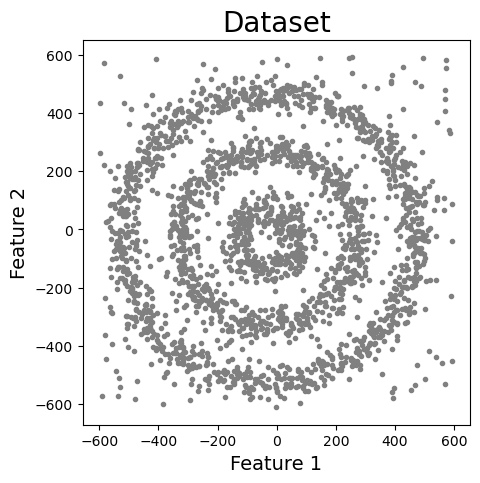

In [6]:
# Set the size of the figure
plt.figure(figsize = (5, 5))

# Draw a scatter plot for the dataframe (df)
plt.scatter(df[0], df[1], s = 9, color = 'grey')
plt.title('Dataset',fontsize = 20)
plt.xlabel('Feature 1',fontsize = 14)
plt.ylabel('Feature 2',fontsize = 14)
plt.show()

## Appling the algorithms

## K-Means vs. Hierarchical vs. DBSCAN Clustering

In [10]:
from sklearn.cluster import KMeans

# Initialise k_means by calling an object KMeans()
k_means = KMeans(n_clusters = 4, random_state = 42)

# Train the model using fit() method
k_means.fit(df[[0, 1]])

KMeans(n_clusters=4, random_state=42)

In [11]:
# Create an additional column in the dataframe (df) as KMeans_labels
df['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df.head()

,0,1,KMeans_labels
0,484.891555,-31.006357,3
1,489.391178,21.973916,3
2,462.886575,-27.599889,3
3,517.218479,5.588090,3
4,455.669049,1.982181,3


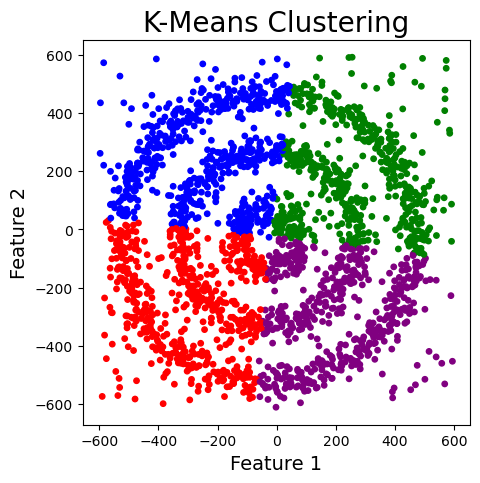

In [12]:
# Plotting resulting clusters 
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))

# Use scatter function to plot all three columns in the form of circles
plt.scatter(df[0], df[1], c = df['KMeans_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

It is clear that K-means failed to cluster the data points into four clusters. Also, it didn’t work well with noise. Therefore, it is time to try another popular clustering algorithm, i.e., Hierarchical Clustering.

## Hierarchical Clustering
In this tutorial, we perform Agglomerative Clustering but there is also another type of hierarchical clustering algorithm known as Divisive Clustering. Use the following syntax:

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Create an object model
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')

# Train the model by calling fit() method
model.fit(df[[0, 1]])

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [21]:
# Add another column into the dataframe (df)
df['HR_labels'] = model.labels_

# Display the dataframe records
df.head()

,0,1,KMeans_labels,HR_labels
0,484.891555,-31.006357,3,1
1,489.391178,21.973916,3,2
2,462.886575,-27.599889,3,1
3,517.218479,5.588090,3,1
4,455.669049,1.982181,3,2


In [15]:
df['KMeans_labels'].unique()

array([3, 2, 1, 0])

In [16]:
df['HR_labels'].unique()

array([1, 2, 0, 3], dtype=int64)

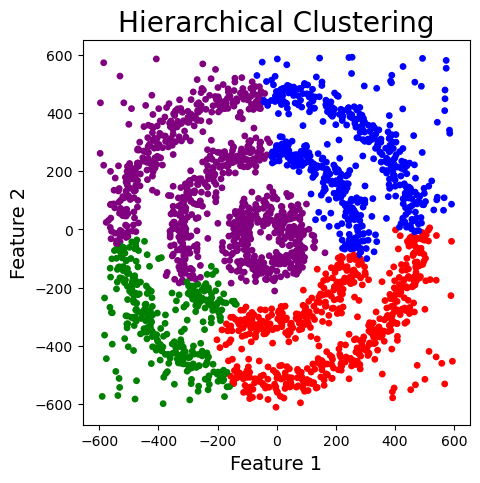

In [22]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))

# Use Scatter() function to plot columns with agglomertive clustering
plt.scatter(df[0], df[1], c = df['HR_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('Hierarchical Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

It is better than k-Means clustering, however, the hierarchical clustering algorithm could not develop clear clusters.

## DBSCAN Clustering

In [24]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN()

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(df[[0,1]])

DBSCAN()

In [27]:
# Add another column into the dataframe (df)
df['DBSCAN_labels'] = dbscan.labels_ 

# Display the dataframe records
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,3,1,-1
1,489.391178,21.973916,3,2,-1
2,462.886575,-27.599889,3,1,-1
3,517.218479,5.588090,3,1,-1
4,455.669049,1.982181,3,2,-1


In [28]:
df['DBSCAN_labels'].unique()

array([-1], dtype=int64)

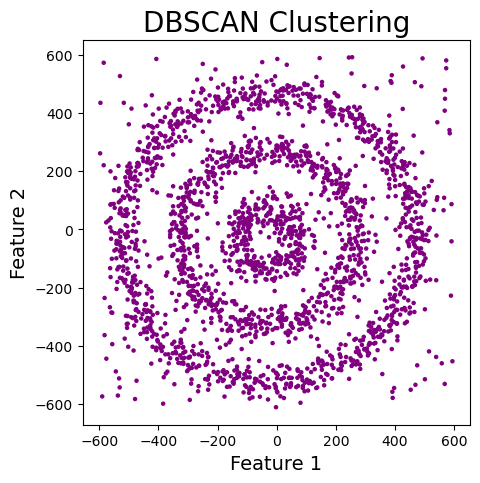

In [29]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))
plt.scatter(df[0], df[1], c = df['DBSCAN_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 5)
plt.title('DBSCAN Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

#### Negative DBSCAN labels [-1]

Data-points considered to be noise points or outliers, which do not belong to any cluster, are often labeled as -1 or as a separate cluster with label 0.
Negative labels are typically used to denote noise points or outliers that are not assigned to any cluster. These points are considered to be not dense enough to be part of any cluster according to the ***density-based criterion of DBSCAN.***

All the data points are now of purple color which means they are treated as noise. It is because the value of <b>epsilon</b> is very small and we didn’t optimize parameters. So we need to find the value of <b>epsilon</b> and <b>minPoints</b> and then train our model again. For <b>epsilon</b>, we are using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.
### you can use gridserach cv to find optimal parameter

# Experimentation with "epsilon and minpoint" argument

In [31]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN(eps=2, min_samples = 100)

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(df[[0,1]])

DBSCAN(eps=2, min_samples=100)

In [32]:
# Add another column into the dataframe (df)
df['DBSCAN_labels'] = dbscan.labels_ 

# Display the dataframe records
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,3,1,-1
1,489.391178,21.973916,3,2,-1
2,462.886575,-27.599889,3,1,-1
3,517.218479,5.588090,3,1,-1
4,455.669049,1.982181,3,2,-1


In [33]:
df['DBSCAN_labels'].unique()

array([-1], dtype=int64)

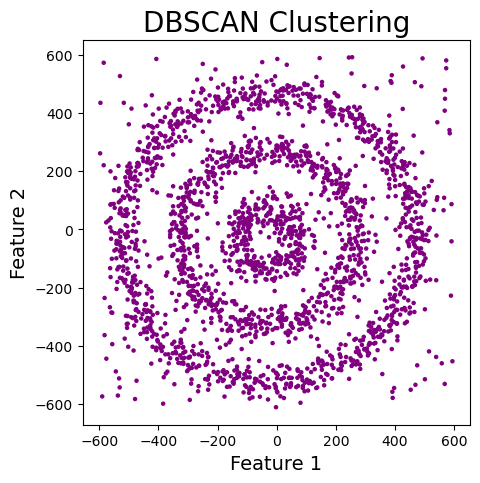

In [34]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))
plt.scatter(df[0], df[1], c = df['DBSCAN_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 5)
plt.title('DBSCAN Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

## Makes no diffrence

### Using "NearestNeighors" algorithm to find the optimal epsilon...

In [37]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(df[[0, 1]])

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(df[[0, 1]])

print(distances, indices)

[[ 0.          6.91861074]
 [ 0.         10.80836526]
 [ 0.          7.56030267]
 ...
 [ 0.         25.77071121]
 [ 0.         23.34523506]
 [ 0.         37.73592453]] [[   0  993]
 [   1 2237]
 [   2    5]
 ...
 [2297  210]
 [2298 2139]
 [2299 2059]]


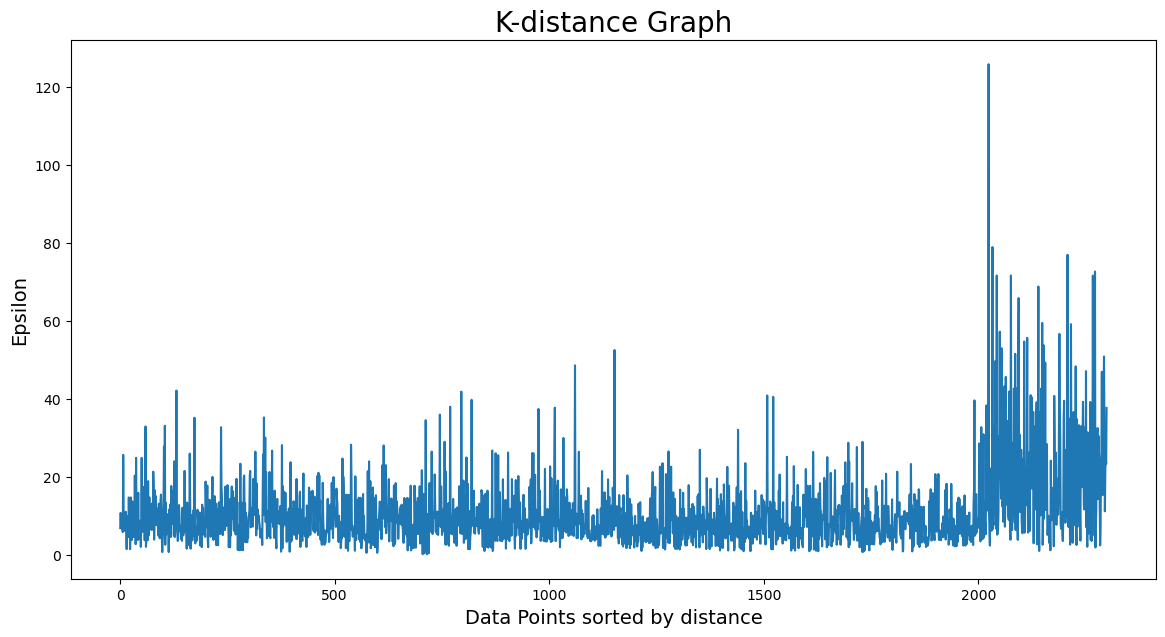

In [38]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

It is clear that the optimum value of <b>epsilon</b> is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now we can find the value of <b>minPoints</b>. The value of <b>minPoints</b> also depends on domain knowledge. Suppose we take <b>minPoints</b> as 6.

***It means the maximum datapoint in the range od datapoints where most of the data variance are found***

In [39]:
from sklearn.cluster import DBSCAN

# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 30, min_samples = 6)

# Train the model by calling a method fit()
dbscan_opt.fit(df[[0, 1]])

DBSCAN(eps=30, min_samples=6)

In [40]:
# Add another column into the dataframe (df)
df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

In [41]:
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels,DBSCAN_opt_labels
0,484.891555,-31.006357,3,1,-1,0
1,489.391178,21.973916,3,2,-1,0
2,462.886575,-27.599889,3,1,-1,0
3,517.218479,5.588090,3,1,-1,0
4,455.669049,1.982181,3,2,-1,0


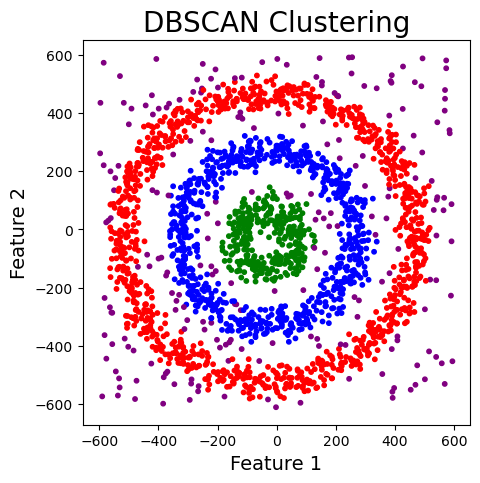

In [42]:
# Plotting the resulting clusters
plt.figure(figsize = (5, 5))
plt.scatter(df[0], df[1], c = df['DBSCAN_opt_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 10)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

### Class separation
The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. So ***0, 1 and 2 are the three different clusters, and -1 is the noise.***

After ploting the result, we found:

DBSCAN clustered the data points into three clusters, and it also detected noise in the dataset represented by the purple color.

It is clear that DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.

# Using actual real world dataset (Wine.csv)
1. Use Wine data set (Available on Moodle) to perform clustering using DBSCAN algorithm. 
2. Compare with K-Means and Agglomerative clustering algorithms by showing visualizations.

In [43]:
df = pd.read_csv('wine_data.csv') # Load wine dataset

In [44]:
df.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


### Plot real wine dataset

In [46]:
import seaborn as sns

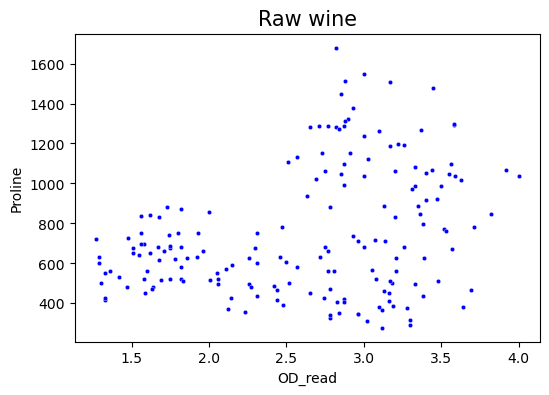

In [63]:
plt.figure(figsize=(6,4))
sns.scatterplot(data= df, x = 'OD_read', y = 'Proline', s= 10, color = 'blue')
plt.title('Raw wine', fontsize=15)
plt.xlabel('OD_read', fontsize=10)
plt.ylabel('Proline', fontsize=10);

In [64]:
X = df.iloc[:, [0,1]].values # Selecting the values of the 1 and second column and storing it in x variable 

In [65]:
from sklearn.cluster import KMeans

# Initialise k_means by calling an object KMeans()
k_means = KMeans(n_clusters = 4, random_state = 42)

# Train the model using fit() method
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

### Getting the labels from trained model

In [66]:
# Create an additional column in the dataframe (df) as KMeans_labels
df['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df.head()

,OD_read,Proline,KMeans_labels
0,3.92,1065.0,3
1,3.40,1050.0,3
2,3.17,1185.0,1
3,3.45,1480.0,1
4,2.93,735.0,0


## Add 'Hue'

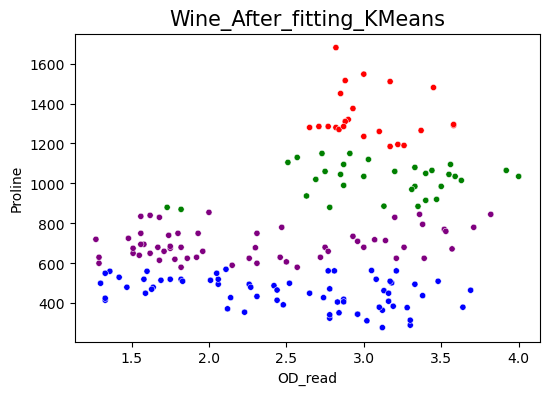

In [83]:
colors = ['purple','red','blue','green']
plt.figure(figsize=(6,4))
sns.scatterplot(data= df, x= 'OD_read', y= 'Proline', c = df['KMeans_labels'],
                cmap=matplotlib.colors.ListedColormap(colors), s= 20)
plt.title('Wine_After_fitting_KMeans', fontsize= 15)
plt.xlabel('OD_read',fontsize= 10)
plt.ylabel('Proline', fontsize = 10);

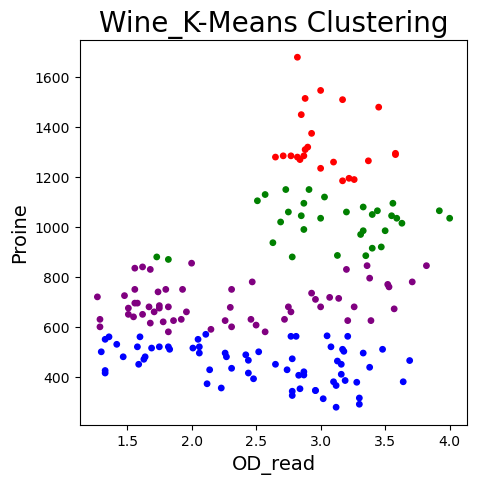

In [84]:
# Plotting resulting clusters 
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))

# Use scatter function to plot all three columns in the form of circles
plt.scatter(df['OD_read'],df['Proline'], c = df['KMeans_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('Wine_K-Means Clustering',fontsize=20)
plt.xlabel('OD_read',fontsize = 14)
plt.ylabel('Proine',fontsize = 14)
plt.show()

## Hierarchical Clustering

In [85]:
# Create an object model
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')

# Train the model by calling fit() method
model.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [86]:
# Add another column into the dataframe (df)
df['HR_labels'] = model.labels_

# Display the dataframe records
df.head()

,OD_read,Proline,KMeans_labels,HR_labels
0,3.92,1065.0,3,3
1,3.40,1050.0,3,3
2,3.17,1185.0,1,3
3,3.45,1480.0,1,1
4,2.93,735.0,0,0


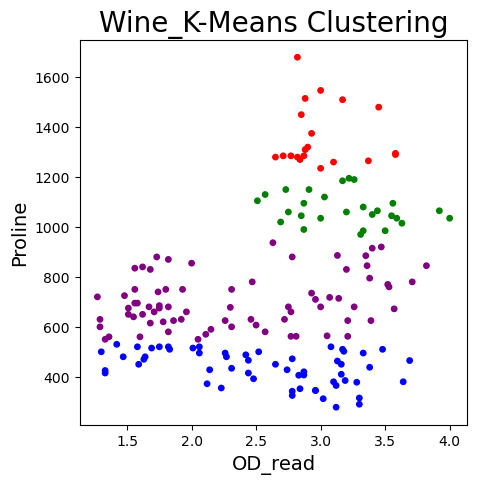

In [88]:
# Plotting resulting clusters 
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))

# Use scatter function to plot all three columns in the form of circles
plt.scatter(df['OD_read'],df['Proline'], c = df['HR_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('Wine_K-Means Clustering',fontsize=20)
plt.xlabel('OD_read',fontsize = 14)
plt.ylabel('Proline',fontsize = 14)
plt.show()

## DBSCAN

In [89]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN()

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(X)

DBSCAN()

In [90]:
# Add another column into the dataframe (df)
df['DBSCAN_labels'] = dbscan.labels_ 

# Display the dataframe records
df.head()

,OD_read,Proline,KMeans_labels,HR_labels,DBSCAN_labels
0,3.92,1065.0,3,3,-1
1,3.40,1050.0,3,3,-1
2,3.17,1185.0,1,3,-1
3,3.45,1480.0,1,1,-1
4,2.93,735.0,0,0,-1


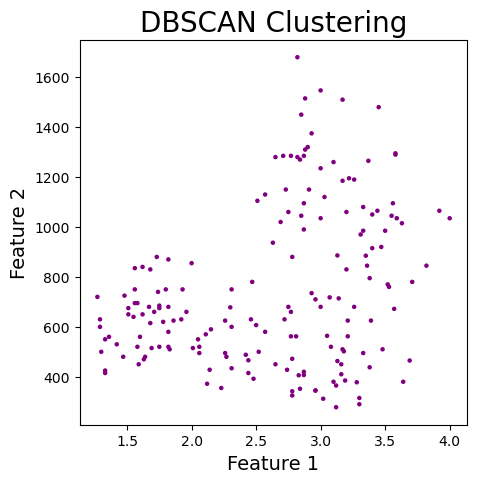

In [91]:
# Plotting resulting clusters
# Create an array colors
colors = ['purple','red','blue','green']

# Set the size of the figure
plt.figure(figsize = (5, 5))
plt.scatter(df['OD_read'],df['Proline'], c = df['DBSCAN_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 5)
plt.title('DBSCAN Clustering',fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

In [92]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(X)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(X)

print(distances, indices)

[[0.00000000e+00 4.80000000e-01]
 [0.00000000e+00 5.00224949e+00]
 [0.00000000e+00 5.00080993e+00]
 [0.00000000e+00 3.00013066e+01]
 [0.00000000e+00 5.13965952e+00]
 [0.00000000e+00 3.00059994e+01]
 [0.00000000e+00 5.00000000e+00]
 [0.00000000e+00 5.00000000e+00]
 [0.00000000e+00 7.00000000e-01]
 [0.00000000e+00 7.00000000e-01]
 [0.00000000e+00 5.00840294e+00]
 [0.00000000e+00 1.70000000e-01]
 [0.00000000e+00 1.00000200e+01]
 [0.00000000e+00 1.80000000e-01]
 [0.00000000e+00 3.20002250e+01]
 [0.00000000e+00 1.00000200e+01]
 [0.00000000e+00 1.70000000e-01]
 [0.00000000e+00 1.00105744e+01]
 [0.00000000e+00 1.33000122e+02]
 [0.00000000e+00 4.60000000e-01]
 [0.00000000e+00 1.24000000e+00]
 [0.00000000e+00 1.00000050e+01]
 [0.00000000e+00 4.10000000e-01]
 [0.00000000e+00 5.08759275e+00]
 [0.00000000e+00 4.60000000e-01]
 [0.00000000e+00 1.52000000e+00]
 [0.00000000e+00 5.00016000e+00]
 [0.00000000e+00 6.00000000e-02]
 [0.00000000e+00 5.00048998e+00]
 [0.00000000e+00 4.10000000e-01]
 [0.000000

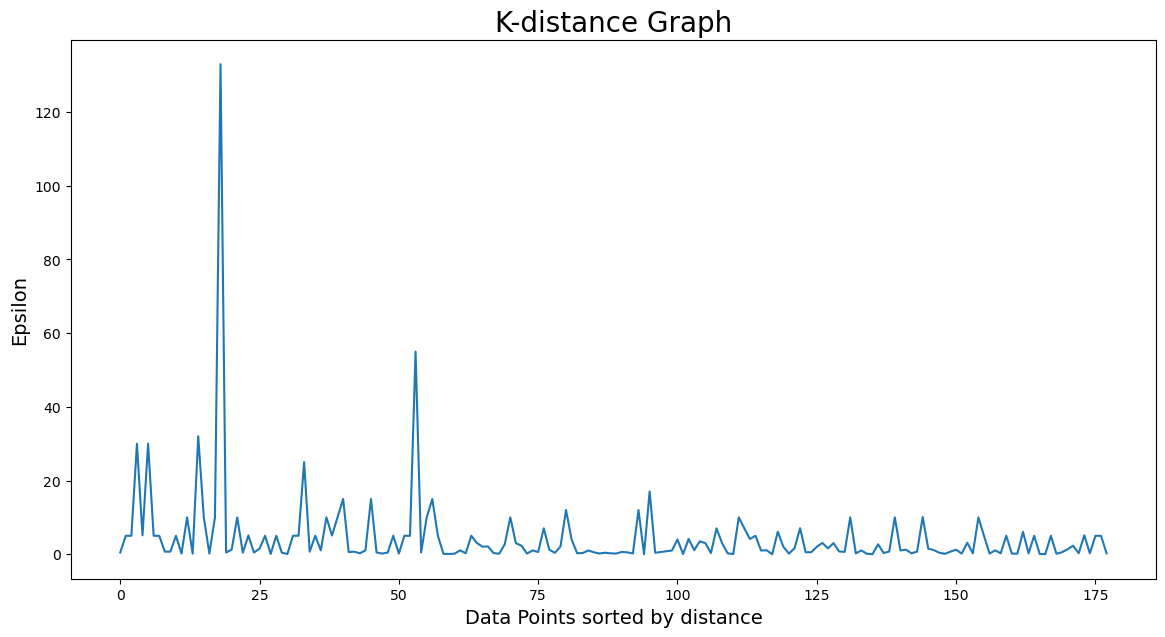

In [93]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [94]:
from sklearn.cluster import DBSCAN

# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 30, min_samples = 6)

# Train the model by calling a method fit()
dbscan_opt.fit(X)


DBSCAN(eps=30, min_samples=6)

In [95]:
# Add another column into the dataframe (df)
df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df['DBSCAN_opt_labels'].value_counts()

 1    114
 0     19
-1     19
 2     13
 3     13
Name: DBSCAN_opt_labels, dtype: int64

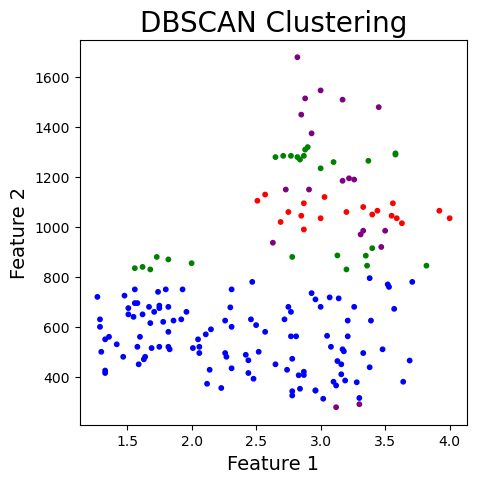

In [96]:
# Plotting the resulting clusters
plt.figure(figsize = (5, 5))
plt.scatter(df['OD_read'], df['Proline'], c = df['DBSCAN_opt_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 10)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.show()

In [55]:
df.head()

,OD_read,Proline,KMeans_labels,HR_labels,DBSCAN_labels,DBSCAN_opt_labels
0,3.92,1065.0,3,3,-1,0
1,3.40,1050.0,3,3,-1,0
2,3.17,1185.0,1,3,-1,-1
3,3.45,1480.0,1,1,-1,-1
4,2.93,735.0,0,0,-1,1


## Reference:
<p>1. https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py</p>
<p>2. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/</p>
<p>3. https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/?ref=rp</p>